# Patient Satisfaction - Visualization

## Import Library and Datasets

In [1]:
from scripts.load_data import load_csv_data
from scripts.plot_function import plot_barh,plot_barh_correlation,plot_region_correlation,plot_comparison_by_region

In [2]:
# Read the data from different years into DataFrames
completed_df = load_csv_data("../data/processed/completed_data.csv", 0)
byRegion_df = load_csv_data('../data/processed/region_statistics.csv', 0)
byState_df = load_csv_data('../data/processed/state_statistics.csv', 0)

## Visualization

### Correlation

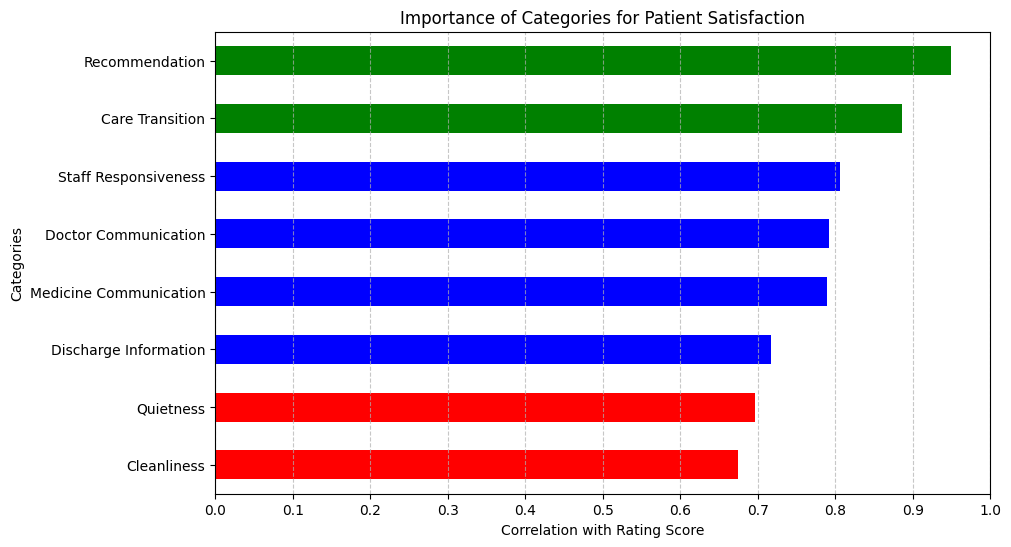

In [3]:
# Plot Nationwide Correlation bar chart
plot_barh_correlation(completed_df)

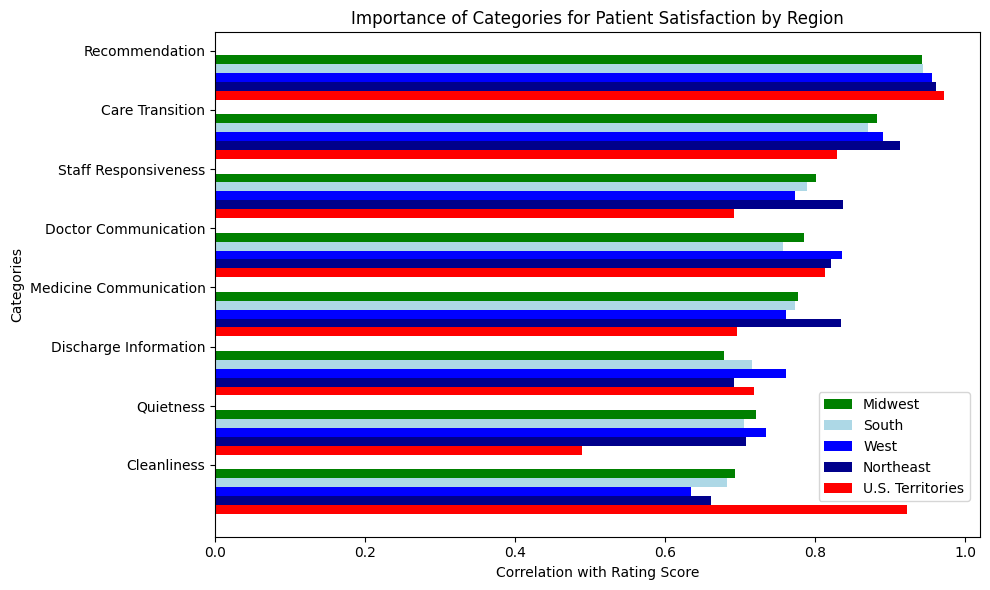

In [4]:
# Plot Nationwide Correlation bar chart for each region
plot_region_correlation(completed_df)

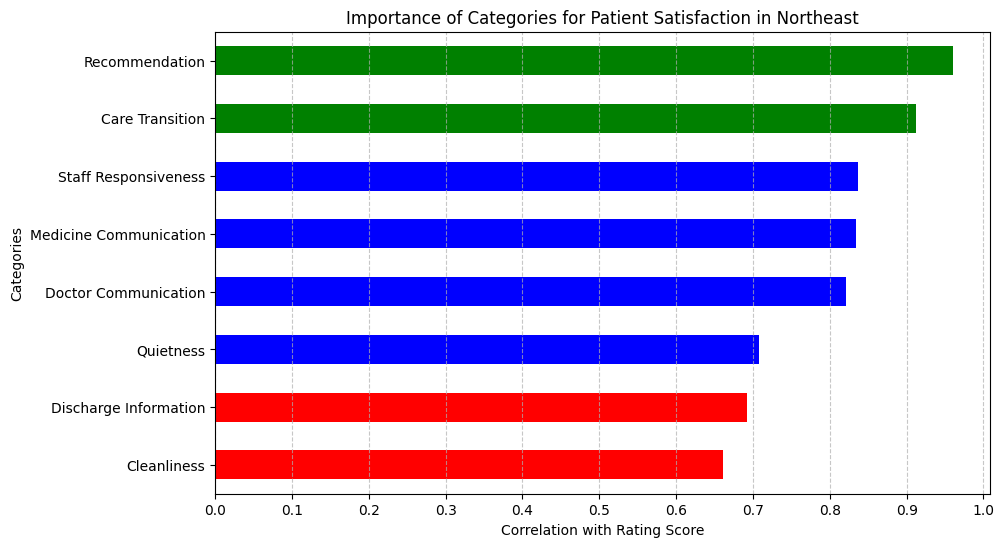

In [5]:
# Plot Correlation bar chart for Northeast region
plot_barh_correlation(completed_df, 'Northeast')

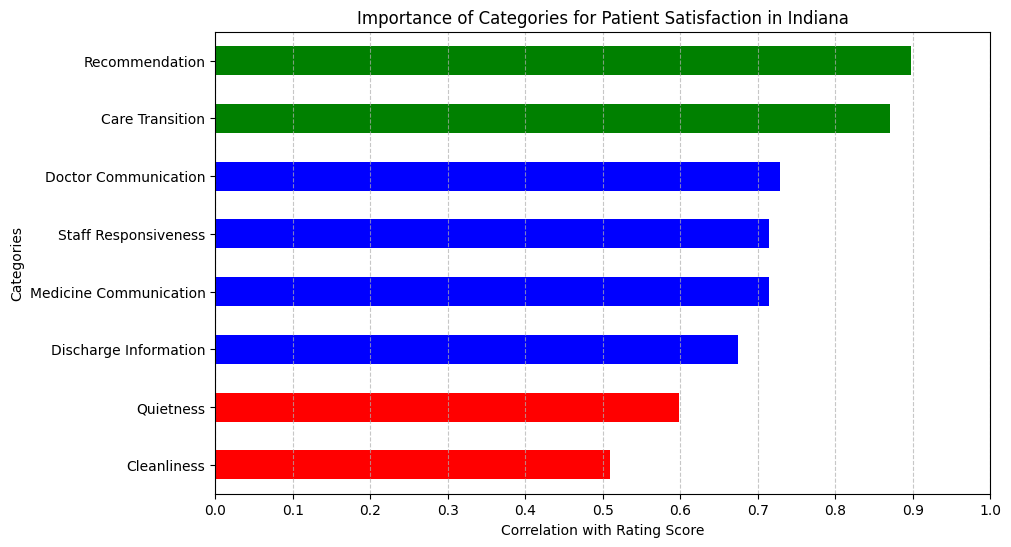

In [6]:
# Plot Correlation bar chart for Indiana state
plot_barh_correlation(completed_df, state='IN')

### Comparions by Regions

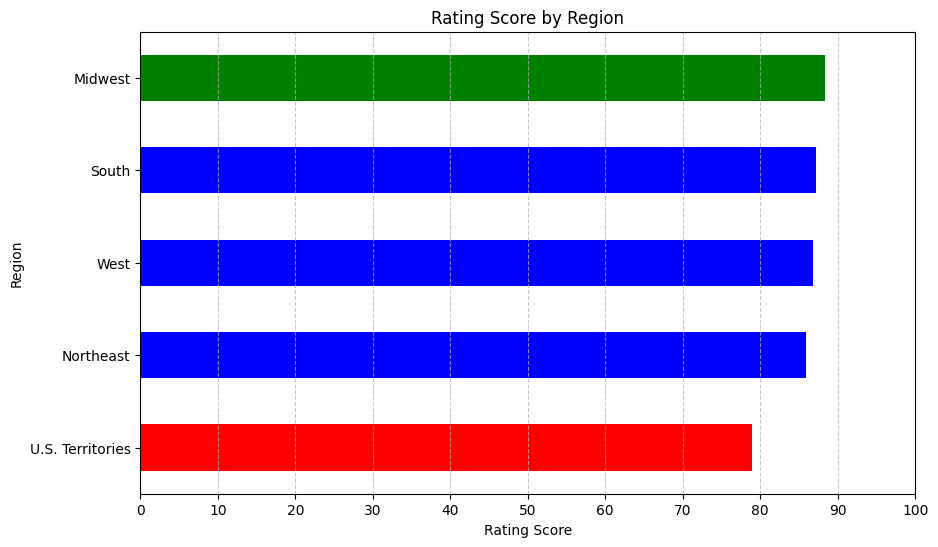

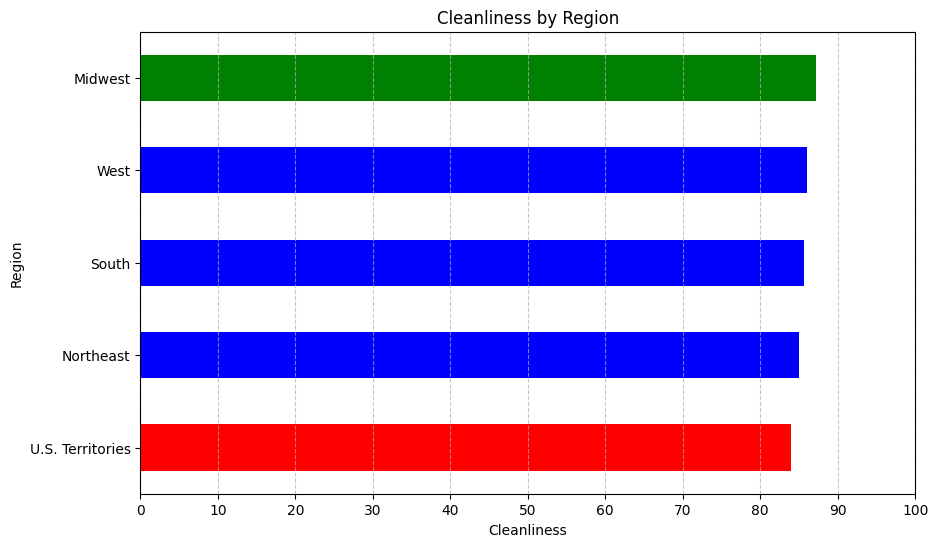

In [7]:
# Plot Rating Score Comparison by region
plot_comparison_by_region(byRegion_df,'Rating Score')

# Plot Cleanliness Comparison by region
plot_comparison_by_region(byRegion_df,'Cleanliness')

### Overall Score by State

In [8]:
# Plot by State
colors = ['blue','red','blue','blue','blue']
# Plot the total rating score per region
# plot_barh(byState_df.loc[['IN', 'TX', 'CA', 'FL','DC'],['Rating Score'] ],
#           'Overall Rating Score by State',
#           'Total Rating Score',
#           'State',
#           colors,
#           100)

### Map Visualization By States

In [9]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

def makeUsaMapVisualization(dataframe, state_column_name, variable):
    
    # Merge DataFrame wtih gdf
    gdf = gpd.read_file('../data/raw/cb_2018_us_state_500k')
    gdf = gdf.merge(dataframe,left_on='STUSPS',right_on=state_column_name)

    # Apply this the gdf to ensure that all states are assigned colors by the same function
    def makeColorColumn(gdf,variable,vmin,vmax):
        # apply a function to a column to create a new column of assigned colors & return full frame
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
        mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
        gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
        return gdf
    
    # Assigning color to states on dataframe
    gdf = makeColorColumn(gdf,variable,gdf[variable].min(),gdf[variable].max())

    # create "visframe" as a re-projected gdf using EPSG 2163
    visframe = gdf.to_crs({'init':'epsg:2163'})

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(16, 12))
    # remove the axis box around the vis
    ax.axis('off')

    # add a title and annotation
    ax.set_title('Patient Satisfaction - '+variable, fontdict={'fontsize': '42', 'fontweight' : '1'})

    # Create colorbar legend
    fig = ax.get_figure()
    # add colorbar axes to the figure
    # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
    cbax = fig.add_axes([0.8, 0.3, 0.03, 0.25])

    cbax.set_title(variable, fontdict={'fontsize': '15', 'fontweight' : '0'})

    # Add continuous color scale 
    sm = plt.cm.ScalarMappable(cmap="YlOrBr", norm=plt.Normalize(vmin=gdf[variable].min(), vmax=gdf[variable].max()))

    comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
    fig.colorbar(sm, cax=cbax, format=comma_fmt)
    cbax.tick_params(labelsize=16)
    ax.annotate("Data: Centers for Medicare & Medicaid Services Data, snapshot date 01/31/2024", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

    # create map
    # Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
    for row in visframe.itertuples():
        if row.STUSPS not in ['AK','HI']:
            c = gdf[gdf.STUSPS==row.STUSPS][0:1].value_determined_color.item()
            visframe[visframe.STUSPS==row.STUSPS].plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')
            # Add State labels to the map
            ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row.STUSPS, fontsize=10, ha='center')
        



c:\Users\vivas\Documents\PFW\3-Spring 24\Data Visualization\Project\PublicHealthExperience\venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


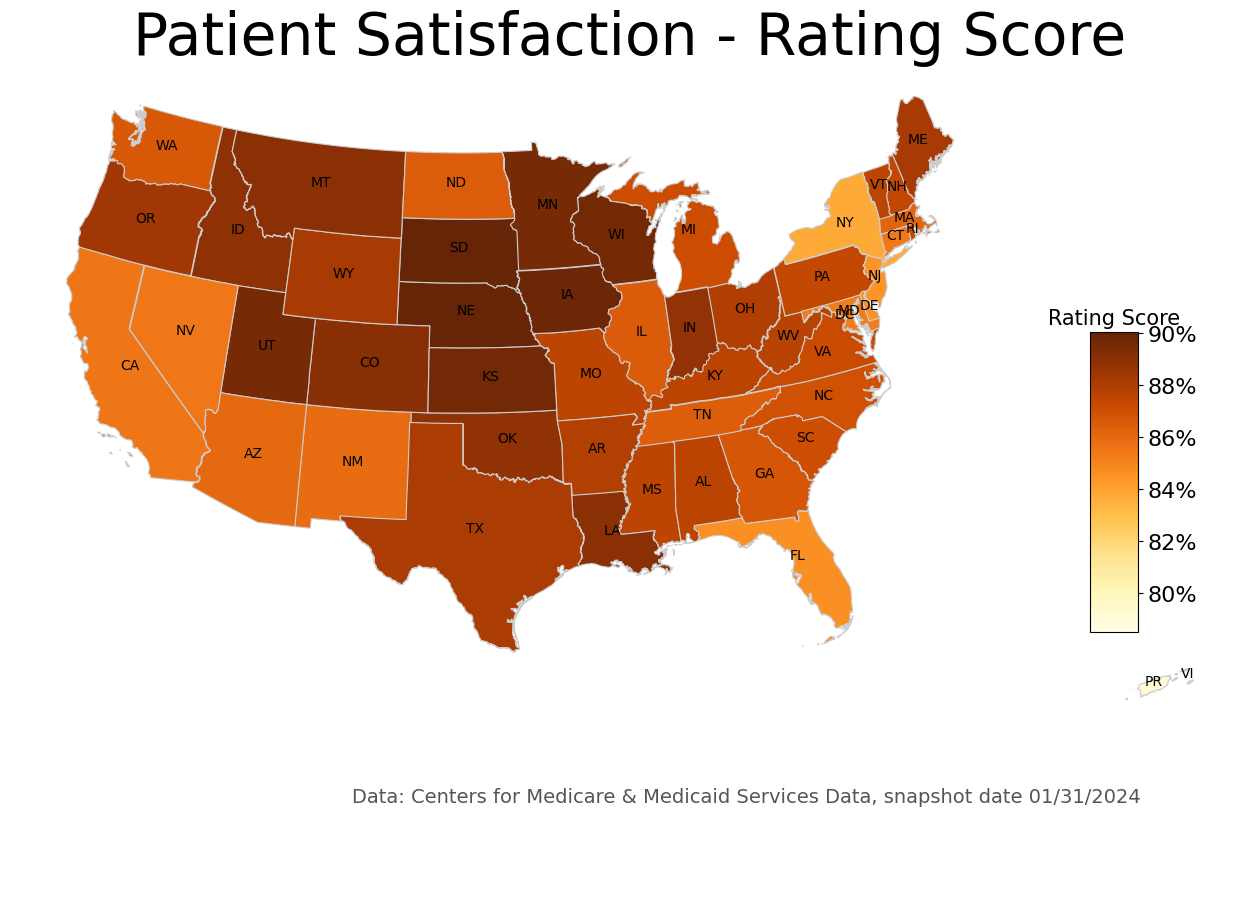

In [10]:
# Generate Map Visualization Rating Score
makeUsaMapVisualization(byState_df, 'State','Rating Score')

c:\Users\vivas\Documents\PFW\3-Spring 24\Data Visualization\Project\PublicHealthExperience\venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


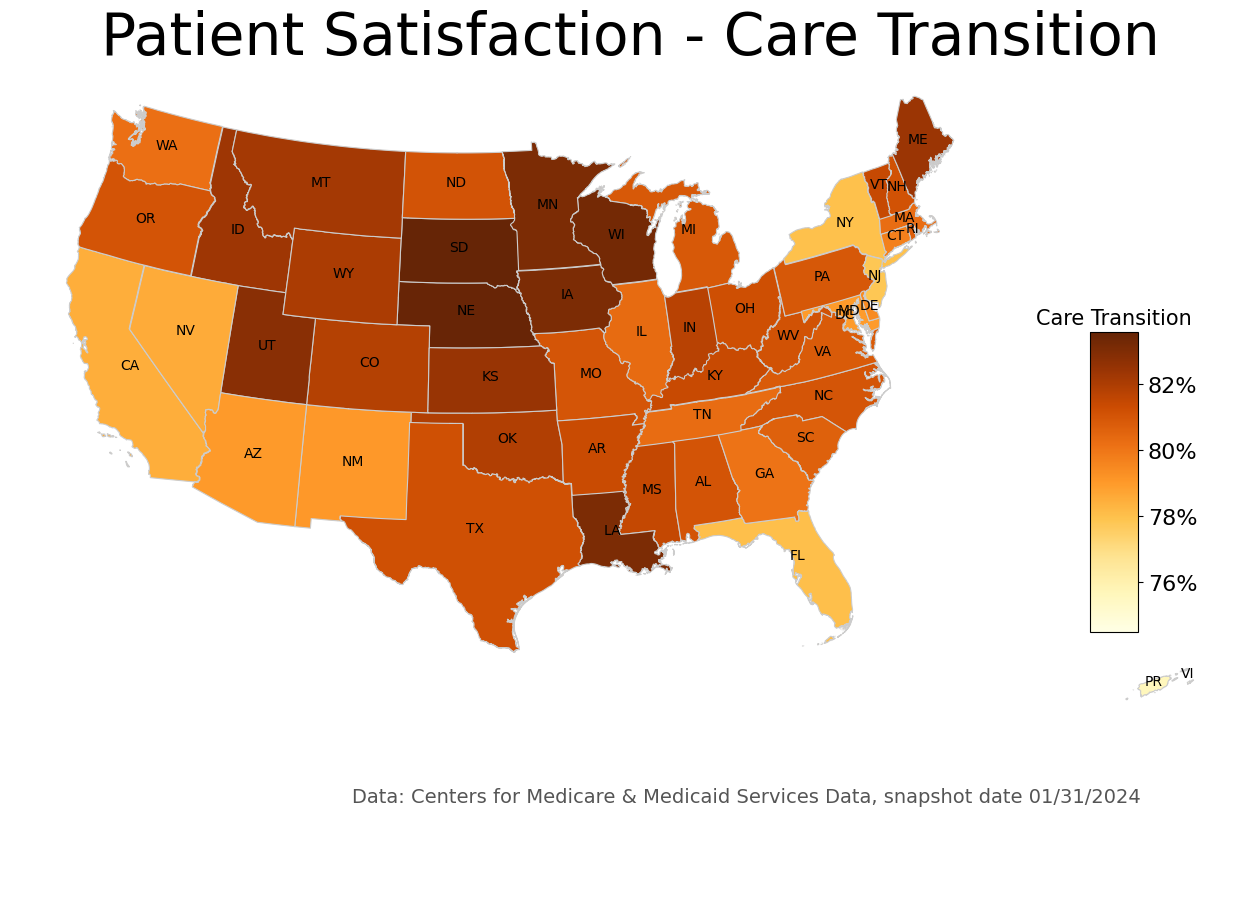

In [11]:
# Generate Map Visualization Care Transition
makeUsaMapVisualization(byState_df, 'State','Care Transition')

c:\Users\vivas\Documents\PFW\3-Spring 24\Data Visualization\Project\PublicHealthExperience\venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


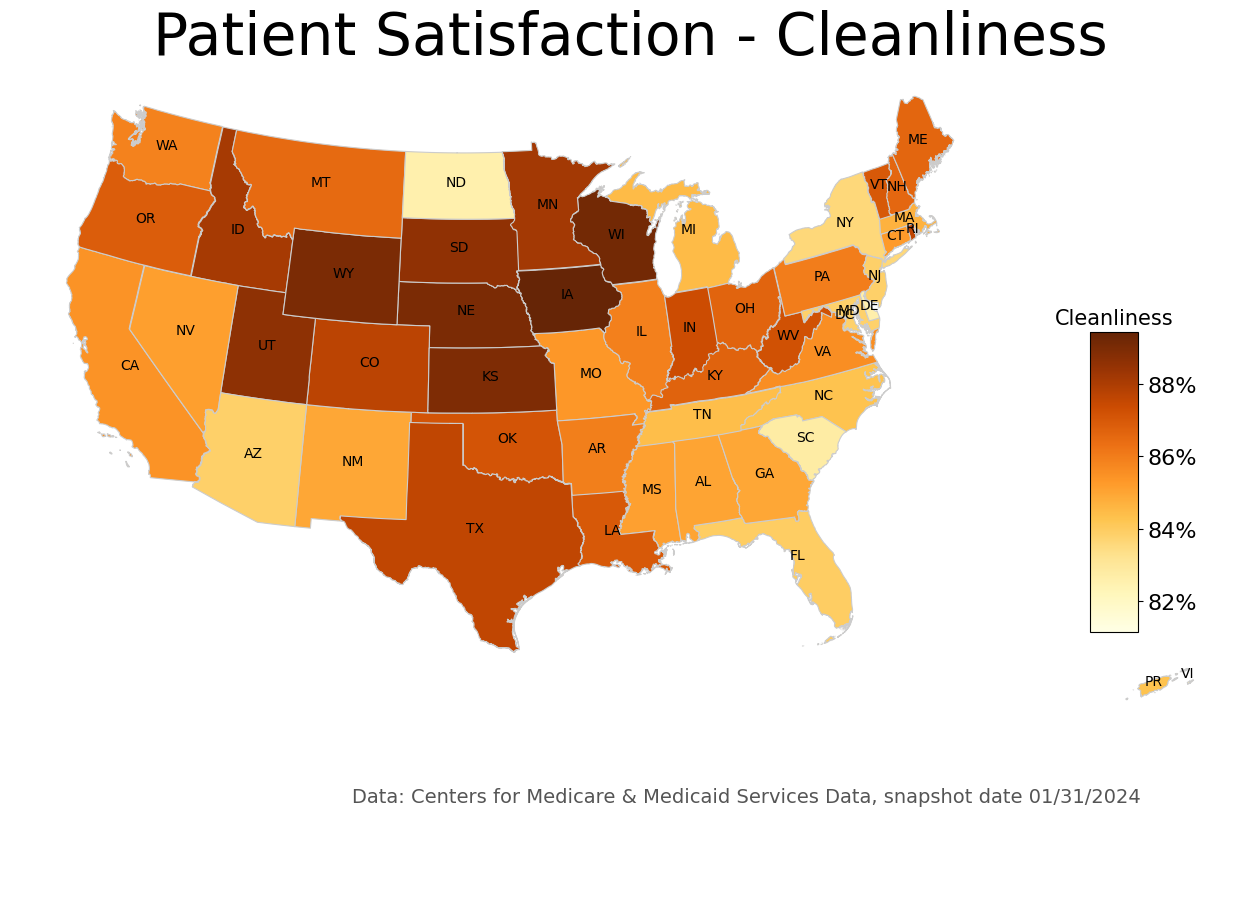

In [12]:
# Generate Map Visualization Care Transition
makeUsaMapVisualization(byState_df, 'State','Cleanliness')